#**EXPLORANDO O ENEM 2021**
Neste notebook nos exploraremos a base de dados do ENEM 2021.

**Os tópicos que iremos abordar neste trabalho:**
1.   Análise Descritiva dos Dados;
2.   Intervalos de confiança;
3.   Testes de Hipóteses;
3.   Análise de Regressão;







## 1 - ANÀLISE DESCRITIVA DOS DADOS
Neste tópico será abordado a limpeza, a localização, limpeza e a preparação dos dados para  obtenção de uma melhor análise de dados.

1.1 - Instalação das ferramentas usadas neste projeto

In [ ]:
# Motando o Google Dirve||
from google.colab import drive
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import scipy.stats as stat
import plotly.express as px
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
from scipy.stats import t, sem


# Algoritmos de machine learning
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

sns.set()
drive.mount('/content/drive')

Mounted at /content/drive


1.2 - Limpeza dos dados

Legenda da base de dados:

**NU_NOTA_REDACAO**

Descrição: Nota da prova de redação

Valores possíveis: 0 até 1000

---

**TP_ESCOLA**

Descrição: Tipo de escola do Ensino Médio;

Valores possíveis: **1**	Não Respondeu, **2**	Pública e **3**	Privada;

---

**IN_TREINEIRO**

Descrição: Indica se o inscrito fez a prova com intuito de apenas treinar seus conhecimentos;

Valores possíveis: **1**	Sim e **0**	Não

---

**Q001**

Descrição: Até que série seu pai, ou o homem responsável por você, estudou?;

Valores possíveis: **A**	Nunca estudou, **B**	Não completou a 4ª série/5º ano do Ensino Fundamental, **C**	Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental, **D**	Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio, **E** Completou o Ensino Médio, mas não completou a Faculdade, **F** Completou a Faculdade, mas não completou a Pós-graduação, **G** Completou a Pós-graduação, **H** Não sei.

---

**Q002**

Descrição: Até que série sua mãe, ou a mulher responsável por você, estudou?

Valores possíveis: **A**	Nunca estudou, **B**	Não completou a 4ª série/5º ano do Ensino Fundamental, **C**	Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental, **D**	Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio, **E**	Completou o Ensino Médio, mas não completou a Faculdade, **F**	Completou a Faculdade, mas não completou a Pós-graduação, **G**	Completou a Pós-graduação e **H**	Não sei.

---

**Q005**

Descrição: Incluindo você, quantas pessoas moram atualmente em sua residência?

Valores possíveis: **1**, pois moro sozinho(a), **2**, **3**, **4**, **5**, **6**, **7**, **8**, **9**, **10**, **11**, **12**, **13**, **14**, **15**, **16**, **17**, **18**, **19** e **20**

---

**Q006**

Descrição: Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.)

Valores possíveis: **A**	Nenhuma Renda, **B**	Até R$ 1.100,00, **C**	De R$ 1.100,01 até R$ 1.650,00, **D**	De R$ 1.650,01 até R$ 2.200,00, **E**	De R$ 2.200,01 até R$ 2.750,00, **F**	De R$ 2.750,01 até R$ 3.300,00, **G**	De R$ 3.300,01 até R$ 4.400,00, **H**	De R$ 4.400,01 até R$ 5.500,00, **I**	De R$ 5.500,01 até R$ 6.600,00, **J**	De R$ 6.600,01 até R$ 7.700,00, **K**	De R$ 7.700,01 até R$ 8.800,00, **L**	De R$ 8.800,01 até R$ 9.900,00, **M**	De R$ 9.900,01 até R$ 11.000,00, **N**	De R$ 11.000,01 até R$ 13.200,00, **O**	De R$ 13.200,01 até R$ 16.500,00, **P**	De R$ 16.500,01 até R$ 22.000,00 e **Q**	Acima de R$ 22.000,00.

---

**Q010**

Descrição: Na sua residência tem carro?

Valores possíveis: **A**	Não, **B**	Sim, um, **C**	Sim, dois, **D**	Sim, três e **E**	Sim, quatro ou mais.

---

**Q024**

Descrição: Na sua residência tem computador?

Valores possíveis: **A**	Não, **B**	Sim, um, **C**	Sim, dois, **D**	Sim, três e **E**	Sim, quatro ou mais.

---

**Q025**

Descrição: Na sua residência tem acesso à Internet?

Valores possíveis: **A**	Não e **B**	Sim.


In [ ]:
df = pd.read_csv(
    'drive/MyDrive/Colab Notebooks/MICRODADOS_ENEM_2021.csv',
     sep=';',
     usecols = ['NU_NOTA_REDACAO', 'TP_ESCOLA', 'Q001','Q002','Q005','Q006','Q010','Q024','Q025', 'IN_TREINEIRO'],
     encoding= 'ISO-8859-1'
     )
dados_2021 = df

1.2.1 - Tratando de pessoas treineiras

As pessoas que utilizam o enem com intuito de apenas treinar seus conhecimentos serão removidos desta analise.

In [ ]:
dados_2021.groupby('IN_TREINEIRO').count()

,TP_ESCOLA,NU_NOTA_REDACAO,Q001,Q002,Q005,Q006,Q010,Q024,Q025
IN_TREINEIRO,,,,,,,,,
0,2952642,1984242,2952640,2952640,2952640,2952640,2952640,2952640,2952640
1,437190,394137,437190,437190,437190,437190,437190,437190,437190


In [ ]:
dados_2021.drop(dados_2021[dados_2021['IN_TREINEIRO'] == 1].index, inplace = True)
dados_2021[dados_2021['IN_TREINEIRO'] == 1]
dados_2021.drop('IN_TREINEIRO', axis='columns', inplace= True)

In [ ]:
dados_2021

,TP_ESCOLA,NU_NOTA_REDACAO,Q001,Q002,Q005,Q006,Q010,Q024,Q025
0,1,760.0,F,F,3.0,D,B,B,B
1,1,560.0,B,B,3.0,B,A,A,A
2,1,NaN,B,C,3.0,C,A,B,B
3,2,780.0,B,B,6.0,B,A,B,B
4,2,780.0,D,E,4.0,C,A,B,B
...,...,...,...,...,...,...,...,...,...
3389827,1,NaN,B,B,5.0,C,A,A,B
3389828,1,NaN,E,E,4.0,G,C,B,B
3389829,1,NaN,B,C,1.0,F,A,B,B
3389830,1,660.0,E,D,4.0,E,C,C,B


1.2.2 - Tratando de valores nulos

Todas as colunas da base de dados possuem valores nulos. A coluna referente a nota de redação é a que mais possui valores nulos. Diante disso,  para evitar excluir esses dados, a gente vai utilizar uma medida de tendência central para preencher esses valores. Já as outras colunas, por ter quantidades pequenas de valores nulos, a gente vai excluir essas observações.

In [ ]:
dados_2021.isna().sum()

TP_ESCOLA               0
NU_NOTA_REDACAO    968400
Q001                    2
Q002                    2
Q005                    2
Q006                    2
Q010                    2
Q024                    2
Q025                    2
dtype: int64

In [ ]:
print("######## Valores das medias antes do tratamento de valores nulos ###########")

print("######## Medidas de tendência central ###########")
print("A média das notas de redação é: ", dados_2021['NU_NOTA_REDACAO'].mean())
print("A mediana das notas de redação é: ", dados_2021['NU_NOTA_REDACAO'].median())
print("A moda das notas de redação é: ", dados_2021['NU_NOTA_REDACAO'].mode()[0])
print("")
print("######## Medidas de dispersão ###########")
print("A amplitude das notas de redação é: ", dados_2021['NU_NOTA_REDACAO'].max() - dados_2021['NU_NOTA_REDACAO'].min())
print("A variância das notas de redação é: ", dados_2021['NU_NOTA_REDACAO'].var())
print("O desvio padrão das notas de redação é: ", dados_2021['NU_NOTA_REDACAO'].std())

######## Valores das medias antes do tratamento de valores nulos ###########
######## Medidas de tendência central ###########
A média das notas de redação é:  614.1973206897143
A mediana das notas de redação é:  600.0
A moda das notas de redação é:  560.0

######## Medidas de dispersão ###########
A amplitude das notas de redação é:  1000.0
A variância das notas de redação é:  36180.54763238723
O desvio padrão das notas de redação é:  190.21184934800257


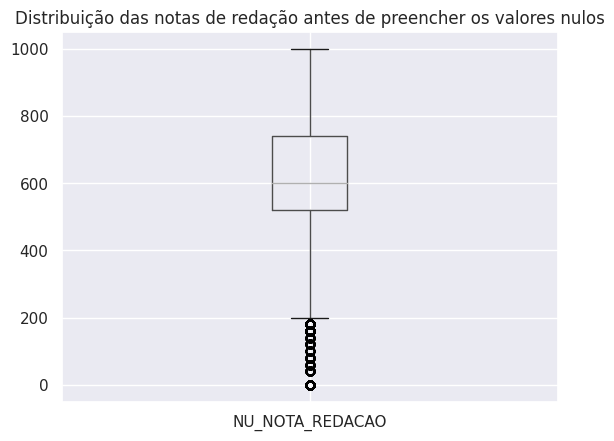

In [ ]:
dados_2021.boxplot(column=['NU_NOTA_REDACAO'], return_type='axes');
plt.title("Distribuição das notas de redação antes de preencher os valores nulos")
plt.show()

In [ ]:
## Preencher valores nulos da coluna nota de redação pela média das notas
dados_2021["NU_NOTA_REDACAO"].fillna(dados_2021['NU_NOTA_REDACAO'].mean(), inplace=True)

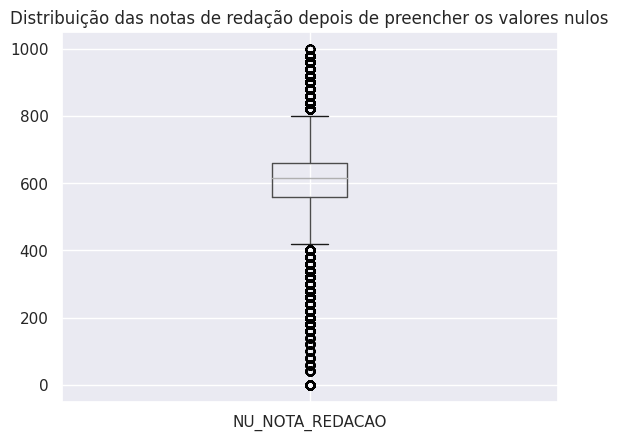

In [ ]:
dados_2021.boxplot(column=['NU_NOTA_REDACAO'], return_type='axes');
plt.title("Distribuição das notas de redação depois de preencher os valores nulos")
plt.show()

In [ ]:
## Excluindo observações com valores ausentes
dados_2021.dropna(axis=0, inplace = True)
dados_2021.isna().sum()

TP_ESCOLA          0
NU_NOTA_REDACAO    0
Q001               0
Q002               0
Q005               0
Q006               0
Q010               0
Q024               0
Q025               0
dtype: int64

Após a limpeza dos dados é possível observar uma diminuição no valor do desvio padrão, ou seja, os dados ficaram menos dispersos.

In [ ]:
print("######## Valores das medias após o tratamento de valores nulos ###########")

print("######## Medidas de tendência central ###########")
print("A média das notas de redação é: ", dados_2021['NU_NOTA_REDACAO'].mean())
print("A mediana das notas de redação é: ", dados_2021['NU_NOTA_REDACAO'].median())
print("A moda das notas de redação é: ", dados_2021['NU_NOTA_REDACAO'].mode()[0])
print("")
print("######## Medidas de dispersão ###########")
print("A amplitude das notas de redação é: ", dados_2021['NU_NOTA_REDACAO'].max() - dados_2021['NU_NOTA_REDACAO'].min())
print("A variância das notas de redação é: ", dados_2021['NU_NOTA_REDACAO'].var())
print("O desvio padrão das notas de redação é: ", dados_2021['NU_NOTA_REDACAO'].std())

######## Valores das medias após o tratamento de valores nulos ###########
######## Medidas de tendência central ###########
A média das notas de redação é:  614.1973525924595
A mediana das notas de redação é:  614.1973206897143
A moda das notas de redação é:  614.1973206897143

######## Medidas de dispersão ###########
A amplitude das notas de redação é:  1000.0
A variância das notas de redação é:  24314.153251209336
O desvio padrão das notas de redação é:  155.92996264736723


1.2.3 - Calcular  ponto médio da renda familiar mensal

As observações utilizadas neste trabalho estão agrupadas por intervalo. Porém, para fins de cálculos será calculado o ponto médio da renda familiar. O ponto médio é o valor que tem como objetivo representar uma classe. O cálculo do ponto médio é a metade da soma do limite inferior com o limite superior.

In [ ]:
condicoes = [(dados_2021['Q006'] == chr(item)) for item in range(ord('A'), ord('Q')+1)]

valores = [ 0, 550, 1375, 1925, 2475, 3025, 3850, 4950,
            6050, 7150, 8250, 9350, 10450, 12100, 14850,
            19250, 22000]



dados_2021['renda_familiar_pm'] = np.select(condicoes, valores)
dados_2021.drop("Q006", axis='columns', inplace = True)
dados_2021

,TP_ESCOLA,NU_NOTA_REDACAO,Q001,Q002,Q005,Q010,Q024,Q025,renda_familiar_pm
0,1,760.000000,F,F,3.0,B,B,B,1925
1,1,560.000000,B,B,3.0,A,A,A,550
2,1,614.197321,B,C,3.0,A,B,B,1375
3,2,780.000000,B,B,6.0,A,B,B,550
4,2,780.000000,D,E,4.0,A,B,B,1375
...,...,...,...,...,...,...,...,...,...
3389826,1,614.197321,B,D,3.0,B,A,B,1375
3389827,1,614.197321,B,B,5.0,A,A,B,1375
3389828,1,614.197321,E,E,4.0,C,B,B,3850
3389829,1,614.197321,B,C,1.0,A,B,B,3025


1.2.4 - Feature engineering

Utlização da feature engineering (Engenharia de características) para criar a variável quantitativa contínua renda_per_capita. A engenharia de características é muito utilizada na área de aprendizado de máquina e consiste na extração de características de dados brutos. A renda familiar per capita, ou por pessoa, é a divisão da renda total pelo número de pessoas que compõem o ambiente familiar. Ou seja, a variável renda_per_capita é calculada através da divisão entre a renda familiar (renda_familiar_pm) e a quantidade de pessoas residentes no mesmo domicílio (**Q005**).


In [ ]:
dados_2021.eval('renda_per_capita = renda_familiar_pm / Q005', inplace = True)
dados_2021

,TP_ESCOLA,NU_NOTA_REDACAO,Q001,Q002,Q005,Q010,Q024,Q025,renda_familiar_pm,renda_per_capita
0,1,760.000000,F,F,3.0,B,B,B,1925,641.666667
1,1,560.000000,B,B,3.0,A,A,A,550,183.333333
2,1,614.197321,B,C,3.0,A,B,B,1375,458.333333
3,2,780.000000,B,B,6.0,A,B,B,550,91.666667
4,2,780.000000,D,E,4.0,A,B,B,1375,343.750000
...,...,...,...,...,...,...,...,...,...,...
3389826,1,614.197321,B,D,3.0,B,A,B,1375,458.333333
3389827,1,614.197321,B,B,5.0,A,A,B,1375,275.000000
3389828,1,614.197321,E,E,4.0,C,B,B,3850,962.500000
3389829,1,614.197321,B,C,1.0,A,B,B,3025,3025.000000


1.2.5 - Transformação de variáveis qualitativas nominais em quantitativas discreta

Para fins de cálculo de coeficientes de correlação, as variáveis qualitativas nominais, como **Q010**(Quantidades de carros na residência) e **Q024** (Quantidades de computadores na residência) serão transformadas em quantitativas discretas.

In [ ]:
# Transformando a variável Q010(Quantidades de carros na residência) em quantitativa discreta
condicoes = [(dados_2021['Q010'] == chr(item)) for item in range(ord('A'), ord('E')+1)]
valores = [ 0, 1, 2, 3, 4]


dados_2021['Q010'] = np.select(condicoes, valores)
dados_2021.groupby('Q010')['Q010'].count()

Q010
0    1628327
1    1067969
2     222446
3      28169
4       5729
Name: Q010, dtype: int64

Text(0.5, 0, 'Quantidade de carros')

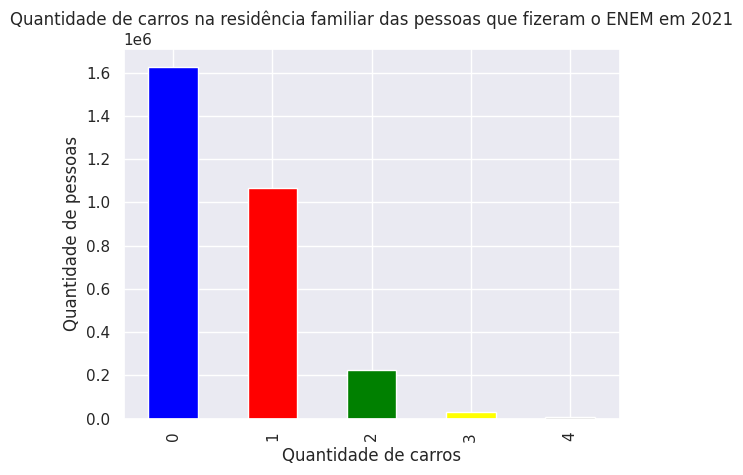

In [ ]:
dados_2021.groupby('Q010')['Q010'].count().plot(kind='bar', x='Q010', color=['blue', 'red', 'green', 'yellow', 'black'],
                                                title='Quantidade de carros na residência familiar das pessoas que fizeram o ENEM em 2021')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Quantidade de carros')

# É possível perceber que a maioria das pessoas que fizeram o ENEM em 2021 não possuem carros

In [ ]:
# Transformando a variável Q024(Quantidades de computadores na residência) em quantitativa discreta
condicoes = [(dados_2021['Q024'] == chr(item)) for item in range(ord('A'), ord('E')+1)]
valores = [ 0, 1, 2, 3, 4]


dados_2021['Q024'] = np.select(condicoes, valores)
dados_2021.groupby('Q024')['Q024'].count()

Q024
0    1315715
1    1209959
2     280852
3      98779
4      47335
Name: Q024, dtype: int64

Text(0.5, 0, 'Quantidade de computadores')

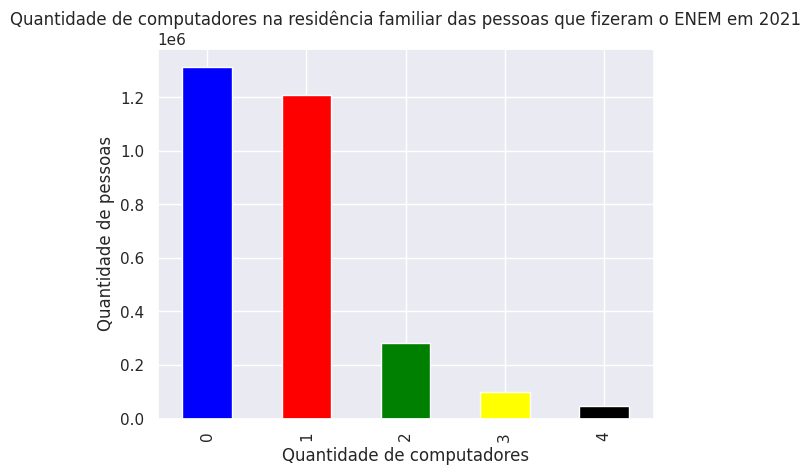

In [ ]:
dados_2021.groupby('Q024')['Q024'].count().plot(kind='bar', x='Q010', color=['blue', 'red', 'green', 'yellow', 'black'],
                                                title='Quantidade de computadores na residência familiar das pessoas que fizeram o ENEM em 2021')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Quantidade de computadores')

# É possível perceber que, aproximadamente, 50% das pessoas que fizeram o ENEM em 2021 não possuem computadores.

1.2.6 - Transformação de variáveis qualitativas ordinais em quantitativas discreta

Também para fins de cálculo de coeficientes de correlação, as variáveis qualitativas ordinais **Q001**(Grau de escolaridade o homem responsável pelo estudante) e **Q002** (Grau de escolaridade da mulher responsável pelo estudante) serão transformadas em quantitativas discretas.

In [ ]:
dados_2021.groupby('Q001')['Q001'].count()

Q001
A    141816
B    600997
C    408273
D    328252
E    812519
F    239090
G    154061
H    267632
Name: Q001, dtype: int64

In [ ]:
dados_2021['Q001'].replace('H', dados_2021['Q001'].mode()[0], inplace = True)
dados_2021['Q002'].replace('H', dados_2021['Q002'].mode()[0], inplace = True)

condicoes_Q001 = [(dados_2021['Q001'] == chr(item)) for item in range(ord('A'), ord('G')+1)]
condicoes_Q002 = [(dados_2021['Q002'] == chr(item)) for item in range(ord('A'), ord('G')+1)]

valores = [ 0, 1, 2, 3, 4, 5, 6]

dados_2021['Q001'] = np.select(condicoes_Q001, valores)
dados_2021['Q002'] = np.select(condicoes_Q002, valores)

([<matplotlib.axis.XTick at 0x7f9d4e5a37c0>,
 [Text(0, 0, 'Nunca estudou'),
  Text(1, 0, 'Não completou a 4ª série/5º ano'),
  Text(2, 0, 'Completou a 4ª série/5º ano'),
  Text(3, 0, 'Completou o Ensino Fundamental'),
  Text(4, 0, 'Completou o Ensino Médio'),
  Text(5, 0, 'Completou a Faculdade'),
  Text(6, 0, 'Completou a Pós-graduação')])

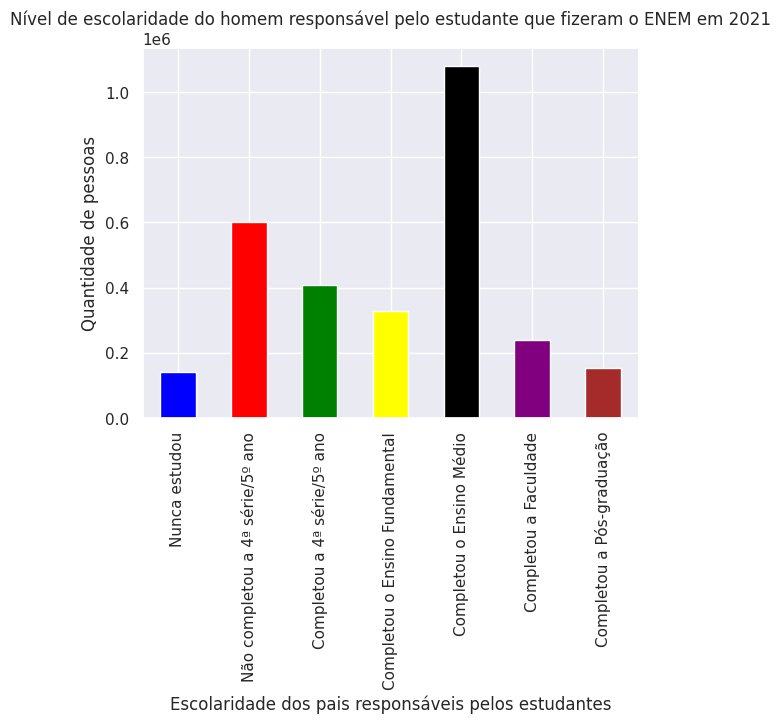

In [ ]:
dados_2021_agrup_QOO1 = dados_2021.groupby('Q001')['Q001'].count()
dados_2021_agrup_QOO1.plot(kind='bar', color=['blue', 'red', 'green', 'yellow', 'black', 'purple', 'brown'],
                                                title='Nível de escolaridade do homem responsável pelo estudante que fizeram o ENEM em 2021')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Escolaridade dos pais responsáveis pelos estudantes')
plt.xticks(dados_2021_agrup_QOO1.index, ['Nunca estudou', 'Não completou a 4ª série/5º ano',
                                         'Completou a 4ª série/5º ano',
                                         'Completou o Ensino Fundamental',
                                         'Completou o Ensino Médio',
                                         'Completou a Faculdade', 'Completou a Pós-graduação'], rotation=90)

#É possível perceber que, aproximadamente, 1/3 das pessoas que fizeram o ENEM em 2021 têm o homem responsável pelo estudante somente com ensino médio concluído


([<matplotlib.axis.XTick at 0x7f9d4e472530>,
 [Text(0, 0, 'Nunca estudou'),
  Text(1, 0, 'Não completou a 4ª série/5º ano'),
  Text(2, 0, 'Completou a 4ª série/5º ano'),
  Text(3, 0, 'Completou o Ensino Fundamental'),
  Text(4, 0, 'Completou o Ensino Médio'),
  Text(5, 0, 'Completou a Faculdade'),
  Text(6, 0, 'Completou a Pós-graduação')])

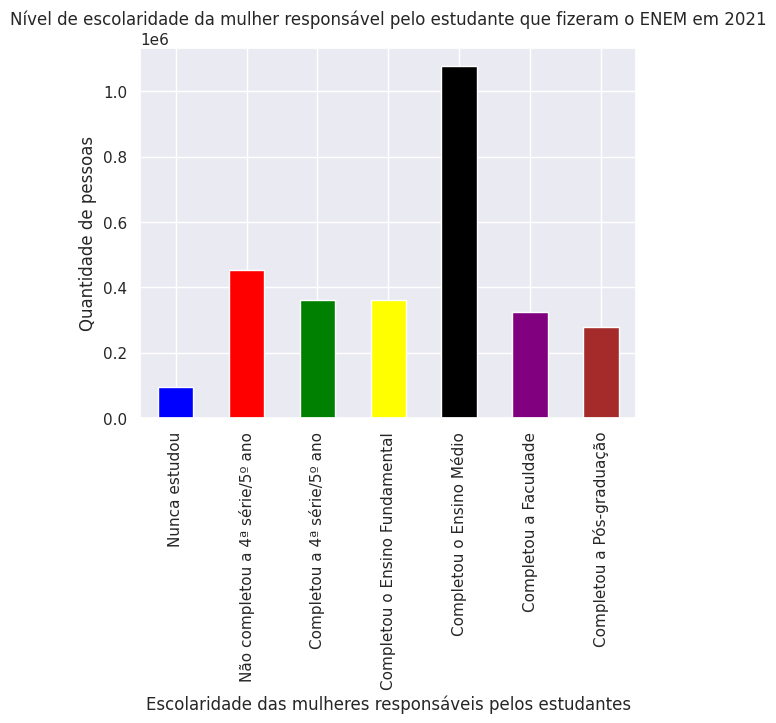

In [ ]:
dados_2021_agrup_QOO2 = dados_2021.groupby('Q002')['Q002'].count()
dados_2021_agrup_QOO2.plot(kind='bar', color=['blue', 'red', 'green', 'yellow', 'black', 'purple', 'brown'],
                                                title='Nível de escolaridade da mulher responsável pelo estudante que fizeram o ENEM em 2021')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Escolaridade das mulheres responsáveis pelos estudantes')
plt.xticks(dados_2021_agrup_QOO2.index, ['Nunca estudou', 'Não completou a 4ª série/5º ano',
                                         'Completou a 4ª série/5º ano',
                                         'Completou o Ensino Fundamental',
                                         'Completou o Ensino Médio',
                                         'Completou a Faculdade', 'Completou a Pós-graduação'], rotation=90)

#É possível perceber que, aproximadamente, 1/3 das pessoas que fizeram o ENEM em 2021 têm a mulher responsável pelo estudante somente com ensino médio concluído


1.2.7 - Transformação de variáveis qualitativas nominais em variáveis dummy

As variáveis **Q025**(Se a residência do estudante possui internet) e **T_ESCOLA**(Tipo de escola do Ensino Médio) serão transformadas em variáveis dummy A variável dummy "torna o valor de "zero" ou "um" indicando a ausência ou presença de qualidades ou atributos" (Unifsa, 2020), Ou seja quando o usuário tiver internet na residência será representando pelo valor 0 e 1 caso contrário.

In [ ]:
# Transformando a variável Q025(Se a residência do estudante possui interne) em variável dummy
dados_2021 = pd.get_dummies(dados_2021, columns=['Q025'], prefix="possui_internet", drop_first = True)
dados_2021.rename(columns={'possui_internet_B': 'possui_internet'}, inplace = True)
dados_2021

,TP_ESCOLA,NU_NOTA_REDACAO,Q001,Q002,Q005,Q010,Q024,renda_familiar_pm,renda_per_capita,possui_internet
0,1,760.000000,5,5,3.0,1,1,1925,641.666667,1
1,1,560.000000,1,1,3.0,0,0,550,183.333333,0
2,1,614.197321,1,2,3.0,0,1,1375,458.333333,1
3,2,780.000000,1,1,6.0,0,1,550,91.666667,1
4,2,780.000000,3,4,4.0,0,1,1375,343.750000,1
...,...,...,...,...,...,...,...,...,...,...
3389826,1,614.197321,1,3,3.0,1,0,1375,458.333333,1
3389827,1,614.197321,1,1,5.0,0,0,1375,275.000000,1
3389828,1,614.197321,4,4,4.0,2,1,3850,962.500000,1
3389829,1,614.197321,1,2,1.0,0,1,3025,3025.000000,1


In [ ]:
# Transformando a variável T_ESCOLA(Tipo de escola do Ensino Médio) em variável dummy
dados_2021 = pd.get_dummies(dados_2021, columns=['TP_ESCOLA'], prefix="tipo_escola")
dados_2021.rename(columns={'tipo_escola_1': 'tipo_escola_nao_sabe', 'tipo_escola_2': 'tipo_escola_publica', 'tipo_escola_3': 'tipo_escola_privada'}, inplace = True)
dados_2021

,NU_NOTA_REDACAO,Q001,Q002,Q005,Q010,Q024,renda_familiar_pm,renda_per_capita,possui_internet,tipo_escola_nao_sabe,tipo_escola_publica,tipo_escola_privada
0,760.000000,5,5,3.0,1,1,1925,641.666667,1,1,0,0
1,560.000000,1,1,3.0,0,0,550,183.333333,0,1,0,0
2,614.197321,1,2,3.0,0,1,1375,458.333333,1,1,0,0
3,780.000000,1,1,6.0,0,1,550,91.666667,1,0,1,0
4,780.000000,3,4,4.0,0,1,1375,343.750000,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3389826,614.197321,1,3,3.0,1,0,1375,458.333333,1,1,0,0
3389827,614.197321,1,1,5.0,0,0,1375,275.000000,1,1,0,0
3389828,614.197321,4,4,4.0,2,1,3850,962.500000,1,1,0,0
3389829,614.197321,1,2,1.0,0,1,3025,3025.000000,1,1,0,0


1.2.8 - Renomear as colunas da tabela

Para simplificar e facilitar um melhor entendimento da base de dados, as colunas serão renomeadas.

In [ ]:
dados_2021.rename(columns={'Q001': 'escolaridade_homem_responsavel', 'Q002': 'escolaridade_mulher_responsavel',
                           'Q005': 'q_pessoas_residencia', 'Q010': 'q_carros_residencia',
                           'Q024': 'q_computadores_residencia', 'renda_familiar_pm': 'renda_familiar'}, inplace = True)
dados_2021

,NU_NOTA_REDACAO,escolaridade_homem_responsavel,escolaridade_mulher_responsavel,q_pessoas_residencia,q_carros_residencia,q_computadores_residencia,renda_familiar,renda_per_capita,possui_internet,tipo_escola_nao_sabe,tipo_escola_publica,tipo_escola_privada
0,760.000000,5,5,3.0,1,1,1925,641.666667,1,1,0,0
1,560.000000,1,1,3.0,0,0,550,183.333333,0,1,0,0
2,614.197321,1,2,3.0,0,1,1375,458.333333,1,1,0,0
3,780.000000,1,1,6.0,0,1,550,91.666667,1,0,1,0
4,780.000000,3,4,4.0,0,1,1375,343.750000,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3389826,614.197321,1,3,3.0,1,0,1375,458.333333,1,1,0,0
3389827,614.197321,1,1,5.0,0,0,1375,275.000000,1,1,0,0
3389828,614.197321,4,4,4.0,2,1,3850,962.500000,1,1,0,0
3389829,614.197321,1,2,1.0,0,1,3025,3025.000000,1,1,0,0


1.3 - Descrevendo os dados

1.3.1 - Analisando a influência da internet na nota de redação do Enem 2021

Analisando o gráfico abaixo é possível perceber que as pessoas que possuem internet no domicílio tiraram uma nota em redação superior em relação as pessoas não possuem internet.


([<matplotlib.axis.XTick at 0x7f9d55e67190>,
 [Text(0, 0, 'Não possui internet'), Text(1, 0, 'Possui internet')])

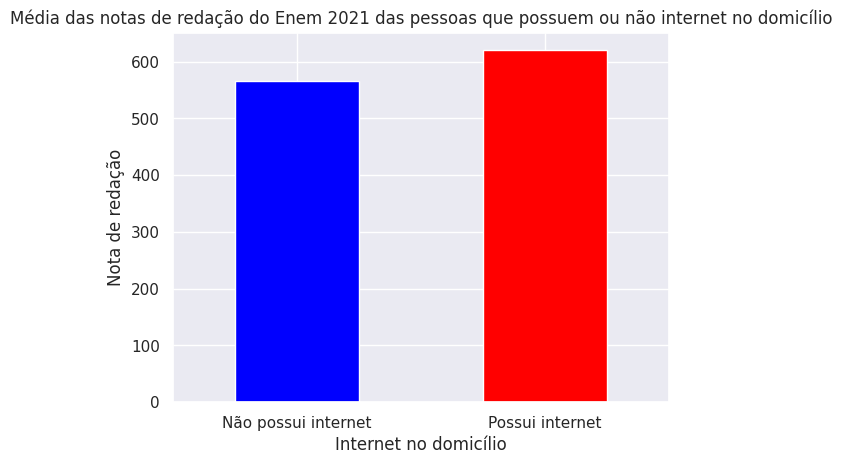

In [ ]:
media_notas_redação_possui_internet = dados_2021.groupby('possui_internet')['NU_NOTA_REDACAO'].mean()
media_notas_redação_possui_internet.plot(x="Internet no domicílio", y=["NU_NOTA_REDACAO"], kind="bar", color=['blue', 'red'],
                                                title='Média das notas de redação do Enem 2021 das pessoas que possuem ou não internet no domicílio')
plt.xlabel('Internet no domicílio')
plt.ylabel('Nota de redação')
plt.xticks(media_notas_redação_possui_internet.index, ['Não possui internet', 'Possui internet'], rotation=0)

1.3.2 - Analisando a influência da renda familiar na nota de redação do Enem 2021

Ao plotar o gráfico da média da nota de redação em relação a renda, é perceptível que quanto maior a renda familiar, maior é a nota do aluno na redação do Enem. Assim, é possível concluir que a renda familiar influencia as notas dos estudantes.

Text(0, 0.5, 'Nota de redação')

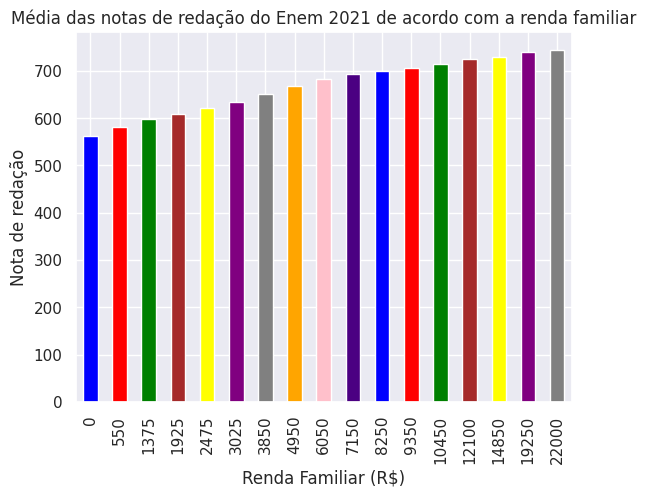

In [ ]:
media_notas_redação_renda_familiar = dados_2021.groupby('renda_familiar')['NU_NOTA_REDACAO'].mean()
media_notas_redação_renda_familiar.plot(x="Renda Familiar (R$)", y=["NU_NOTA_REDACAO"], kind="bar", color=['blue', 'red', 'green', 'brown', 'yellow',
                                                                                                            'purple', 'gray', 'orange', 'pink', 'indigo'],
                                                title='Média das notas de redação do Enem 2021 de acordo com a renda familiar')
plt.xlabel('Renda Familiar (R$)')
plt.ylabel('Nota de redação')

1.3.3 - Analisando a influência da renda per capita na nota de redação do Enem 2021

Observando o gráfico abaixo, é possível observar que a renda per capita não tem uma influência na nota de redação do estudante que fez o Enem em 2021. As pessoas que tem uma renda per capita entre R 0 e R 5000 tiveram notas bem variadas

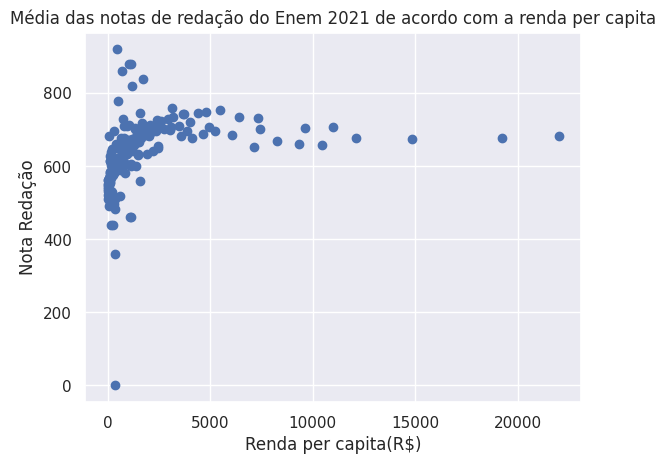

In [ ]:
media_notas_redação_per_capita = dados_2021.groupby('renda_per_capita')['NU_NOTA_REDACAO'].mean().reset_index()
media_notas_redação_per_capita

plt.scatter(media_notas_redação_per_capita['renda_per_capita'], media_notas_redação_per_capita['NU_NOTA_REDACAO'])
plt.title("Média das notas de redação do Enem 2021 de acordo com a renda per capita")
plt.xlabel('Renda per capita(R$)')
plt.ylabel('Nota Redação')
plt.show()

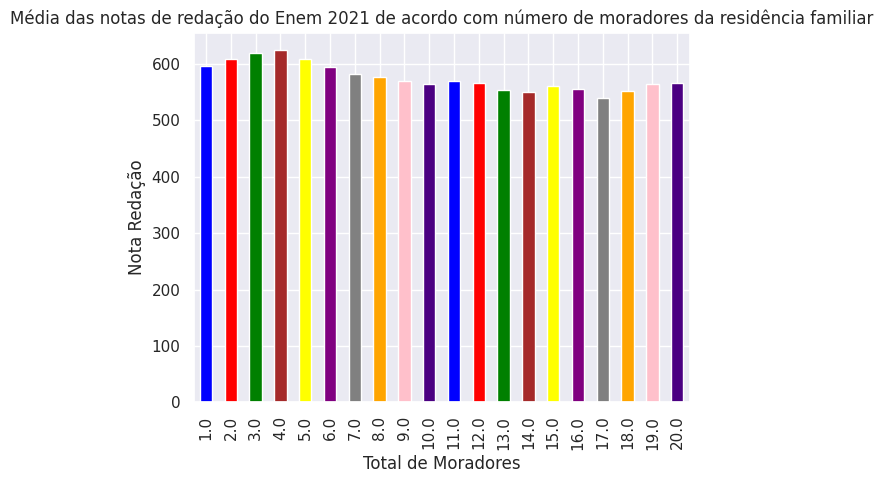

In [ ]:

media_notas_redação_n_moradores = dados_2021.groupby('q_pessoas_residencia')['NU_NOTA_REDACAO'].mean()

media_notas_redação_n_moradores.plot(x="q_pessoas_residencia", y=["NU_NOTA_REDACAO"], kind="bar", color=['blue', 'red', 'green', 'brown', 'yellow',
                                                                                                            'purple', 'gray', 'orange', 'pink', 'indigo'],
                                                title='Média das notas de redação do Enem 2021 de acordo com número de moradores da residência familiar')
plt.xlabel('Total de Moradores')
plt.ylabel('Nota Redação')
plt.show()

1.3.5 - Analisando a influência da quantidade de carros na residência familiar na nota de redação do Enem 2021


Observando o gráfico abaixo, é possível observar as pessoas que tiveram uma nota de redação maior foram as pessoas que possuem mais carros na residência. É possível citar alguns efeitos que a quantidade de carros pode influênciar, de forma direta ou indireta, na nota de redação:


1.  A quantidade de carros têm impacto na renda;
2.  No tempo de estudo;



1.3.4 - Analisando a influência da quantidade de moradores na residência familiar na nota de redação do Enem 2021

Observando o gráfico abaixo, é possível observar que as notas de redação dos estudantes tendem a ser constantes independentemente do número de moradores na residência familiar.


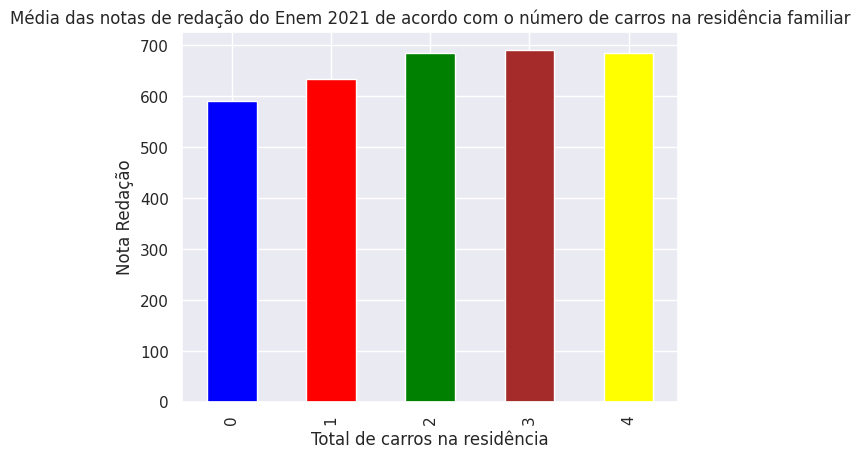

In [ ]:
media_notas_redação_n_carros = dados_2021.groupby('q_carros_residencia')['NU_NOTA_REDACAO'].mean()

media_notas_redação_n_carros.plot(x="q_carros_residencia", y=["NU_NOTA_REDACAO"], kind="bar", color=['blue', 'red', 'green', 'brown', 'yellow'],
                                                title='Média das notas de redação do Enem 2021 de acordo com o número de carros na residência familiar')
plt.xlabel('Total de carros na residência')
plt.ylabel('Nota Redação')
plt.show()

1.3.6 - Analisando a influência da quantidade de computadores na residência familiar na nota de redação do Enem 2021


Observando o gráfico abaixo, é possível observar as pessoas que tiveram uma nota de redação maior foram as pessoas que possuem mais computadores na residência.


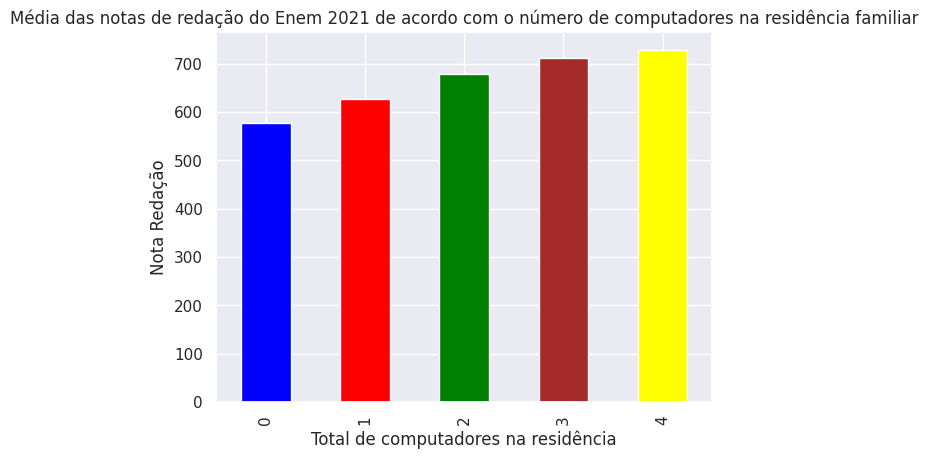

In [ ]:
media_notas_redação_n_computadores = dados_2021.groupby('q_computadores_residencia')['NU_NOTA_REDACAO'].mean()

media_notas_redação_n_computadores.plot(x="q_computadores_residencia", y=["NU_NOTA_REDACAO"], kind="bar", color=['blue', 'red', 'green', 'brown', 'yellow'],
                                                title='Média das notas de redação do Enem 2021 de acordo com o número de computadores na residência familiar')
plt.xlabel('Total de computadores na residência')
plt.ylabel('Nota Redação')
plt.show()

1.3.7 - Analisando a influência da formação do homem e da mulher responsável pelo estudante na nota de redação do estudante no Enem 2021


Observando o gráfico abaixo, é possível observar uma correlação positiva entre a formação do homem/mulher responśavel pelo estudante na nota de redação do próprio estudante


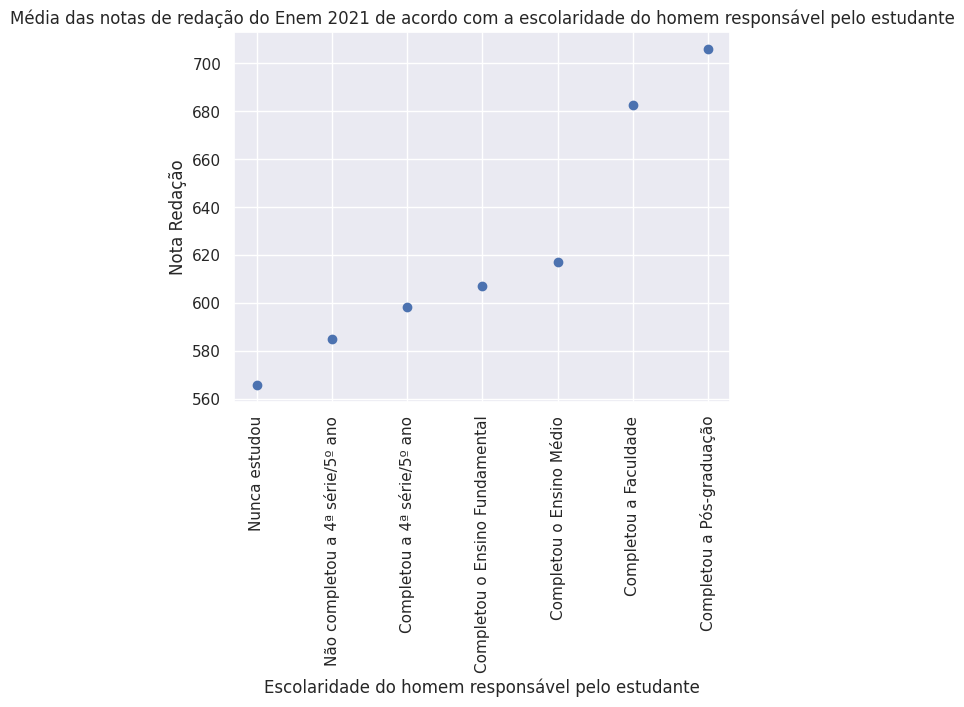

In [ ]:
media_notas_redação_esc_homem = dados_2021.groupby('escolaridade_homem_responsavel')['NU_NOTA_REDACAO'].mean().reset_index()

plt.scatter(media_notas_redação_esc_homem['escolaridade_homem_responsavel'], media_notas_redação_esc_homem['NU_NOTA_REDACAO'])
plt.title("Média das notas de redação do Enem 2021 de acordo com a escolaridade do homem responsável pelo estudante")
plt.xlabel('Escolaridade do homem responsável pelo estudante')
plt.ylabel('Nota Redação')
plt.xticks(dados_2021_agrup_QOO2.index, ['Nunca estudou', 'Não completou a 4ª série/5º ano',
                                         'Completou a 4ª série/5º ano',
                                         'Completou o Ensino Fundamental',
                                         'Completou o Ensino Médio',
                                         'Completou a Faculdade', 'Completou a Pós-graduação'], rotation=90)
plt.show()

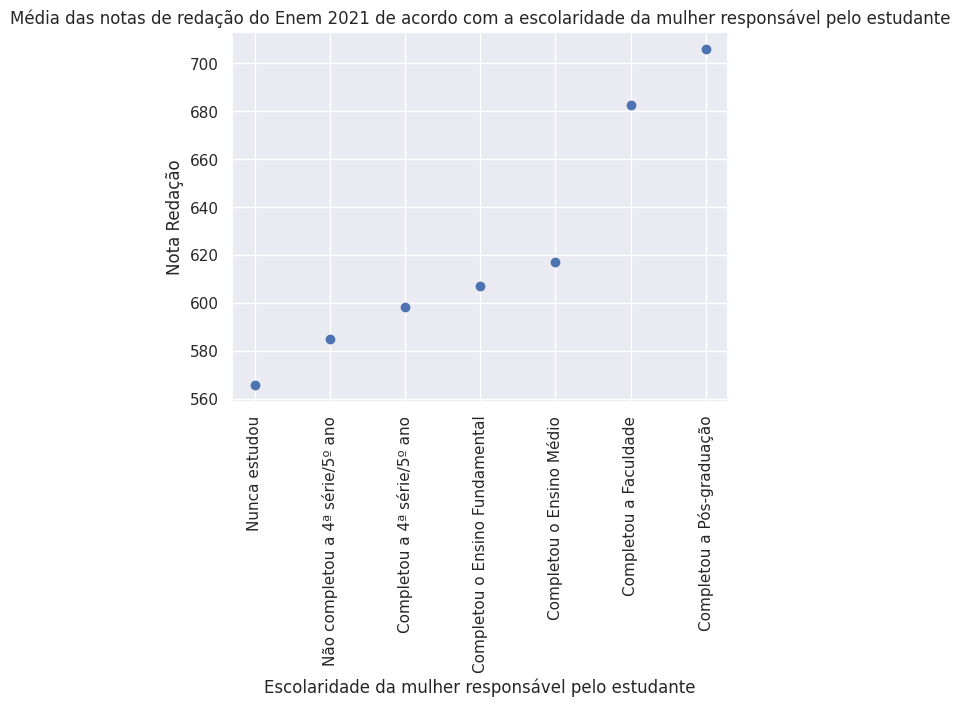

In [ ]:
media_notas_redação_esc_mulher = dados_2021.groupby('escolaridade_mulher_responsavel')['NU_NOTA_REDACAO'].mean().reset_index()

plt.scatter(media_notas_redação_esc_mulher['escolaridade_mulher_responsavel'], media_notas_redação_esc_homem['NU_NOTA_REDACAO'])
plt.title("Média das notas de redação do Enem 2021 de acordo com a escolaridade da mulher responsável pelo estudante")
plt.xlabel('Escolaridade da mulher responsável pelo estudante')
plt.ylabel('Nota Redação')
plt.xticks(dados_2021_agrup_QOO2.index, ['Nunca estudou', 'Não completou a 4ª série/5º ano',
                                         'Completou a 4ª série/5º ano',
                                         'Completou o Ensino Fundamental',
                                         'Completou o Ensino Médio',
                                         'Completou a Faculdade', 'Completou a Pós-graduação'], rotation=90)
plt.show()

1.3.8 - Analisando a influência do tipo de escola do ensino médio na nota de redação do estudante no Enem 2021


Observando a tabela abaixo, é possível observar que as melhores notas da redação do Enem 2021 foi de pessoas que estudaram o ensino médio em uma escola privada


In [ ]:
media_notas_redação_tipo_escola = dados_2021.groupby(['tipo_escola_nao_sabe', 'tipo_escola_publica', 'tipo_escola_privada'])['NU_NOTA_REDACAO'].mean().reset_index()
media_notas_redação_tipo_escola

,tipo_escola_nao_sabe,tipo_escola_publica,tipo_escola_privada,NU_NOTA_REDACAO
0,0,0,1,724.507188
1,0,1,0,583.671522
2,1,0,0,618.668470


## 2 - INTERVALOS DE CONFIANÇA

O intervalo de confiança é expresso na forma de um intervalo de valores, em geral com um nível de confiança associado. Por exemplo, um intervalo de confiança de 95% indica que se o experimento fosse repetido várias vezes, em 95% dos casos o intervalo de confiança obtido conteria o valor real do parâmetro populacional.

In [ ]:
dados = np.array(dados_2021['NU_NOTA_REDACAO'])
iconf_3 = sms.DescrStatsW(dados).tconfint_mean()
iconf_3

(614.0194949245108, 614.3752102611018)

In [ ]:
inter_inf = []
inter_super = []


variaveis = ['NU_NOTA_REDACAO']
escolaridade_homem_responsavel = range(0, 7)
for i in variaveis:
    for j in escolaridade_homem_responsavel:
        intervalo = t.interval(confidence=0.95,
                               df=len(dados_2021[dados_2021['escolaridade_homem_responsavel'] == j][i])-1,
                               loc=np.mean(dados_2021[dados_2021['escolaridade_homem_responsavel'] == j][i]),
                               scale=sem(dados_2021[dados_2021['escolaridade_homem_responsavel'] == j][i]))
        inter_inf.append(intervalo[0])
        inter_super.append(intervalo[1])
intervalos = pd.DataFrame({'Limite Inf': list(inter_inf),
                           'Limite Super': list(inter_super)})
intervalos = intervalos.reset_index()
intervalos

,index,Limite Inf,Limite Super
0,0,564.874664,566.413022
1,1,584.385759,585.098670
2,2,597.765336,598.678108
3,3,606.585180,607.631098
4,4,616.646062,617.234765
5,5,681.895727,683.185300
6,6,705.125069,706.761828


In [ ]:
nomes = pd.DataFrame(list(itertools.product(variaveis,escolaridade_homem_responsavel, repeat=1)),columns= ['Variáveis','escolaridade_homem_responsavel']).reset_index()
nomes

,index,Variáveis,escolaridade_homem_responsavel
0,0,NU_NOTA_REDACAO,0
1,1,NU_NOTA_REDACAO,1
2,2,NU_NOTA_REDACAO,2
3,3,NU_NOTA_REDACAO,3
4,4,NU_NOTA_REDACAO,4
5,5,NU_NOTA_REDACAO,5
6,6,NU_NOTA_REDACAO,6


In [ ]:
intervalos = intervalos.merge(nomes, left_on='index', right_on='index').set_index('index').reset_index(drop=True)
intervalos

,Limite Inf,Limite Super,Variáveis,escolaridade_homem_responsavel
0,564.874664,566.413022,NU_NOTA_REDACAO,0
1,584.385759,585.098670,NU_NOTA_REDACAO,1
2,597.765336,598.678108,NU_NOTA_REDACAO,2
3,606.585180,607.631098,NU_NOTA_REDACAO,3
4,616.646062,617.234765,NU_NOTA_REDACAO,4
5,681.895727,683.185300,NU_NOTA_REDACAO,5
6,705.125069,706.761828,NU_NOTA_REDACAO,6


Diante desse teste podemos ver nitidamente nosso intervalo de confiança de uma forma prática, onde os valores ocorrem conforme ao esperado do teste. suas faixa se limitam a um valor aproximado na casa de 0,1 em cada variável, ou seja,  quanto menor o intervalo de confiança, melhor é a qualidade da estimativa que está sendo feita. Assim, um intervalo de confiança menor indica que a estimativa é mais precisa e mais confiável, pois o intervalo de valores prováveis é menor.

## 3 - TESTES DE HIPÓTESES
Nesta seção serão apresentados os testes de hipóteses. Os testes de hipóteses são métodos estatísticos utilizados para avaliar a significância dos resultdos obtidos em uma amostra, de forma a definir se esses resultados são uma boa generalização para a população.


Os testes serão efetuados para duas das variáveis em estudo,  'possui_internet', 'q_computadores_residencia', etc. Para exemplificar como serão feitos os testes, podemos observar o passo a passo para a variável 'possui_internet'.

*   Escolhemos uma amostra de 50 estudantes aleatórios dos quais possuem internet em seu domicílio
*   Calculamos a média de redação desses estudantes
*   Inferimos duas hipóteses que fazem relacão entre a nota de redação e a variável, a hipótese nula (H0) e a hipótese alternativa (H1)
*   Calculamos o desvio padrão da população que possui internet em seu domicílio
*   Aplicamos o Teste Z
*   Por fim, a depender do resultado do teste, podemos
  1. rejeitar H0 e por consequência aceitar H1 como válida.
  2. não ter evidências suficientes para rejeitar H0, de modo que não será possível concluir se H0 é válida ou não



### 3.1 POSSUI_INTERNET

Abaixo, pode-se observar o código, do qual calcula o Teste Z. 'filter' representa o dataset filtrado para ficar apenas com os estudantes que possuem internet. A variável 'amostra' representa os 50 estudantes aleatórios que fazem parte da amostra, 'desvioPadrao' é o desvio padrão da população de estudantes com acesso a internet.

Ao printarmos a média populacional e a média da amostra, obtemos 620.22 e 600.03 respectivamente. Desse modo a hipótese nula (H0) é a média ser de fato 620.22, e a hipótese alternativa (H1) é a média ser algum valor diferente.

Tomando um nível de confiança de 95%, se o Teste Z resultar em um valor acima de 1.96, ou  abaixo de -1.96, podemos rejeitar H0, e tomar como verdade H1. Caso contrário não é possível rejeitar, ou aceitar H0, com base na amostra escolhida.

Essa aceitação ou rejeição pode ser vizualisada por meio grafico da distribuição normal, do qual pode ser vizualisado abaixo. Pelo fato de estarmos lidando com um teste bilateral, a área de rejeição de H0 está em vermelho, tanto na esquerda, quanto na direita.


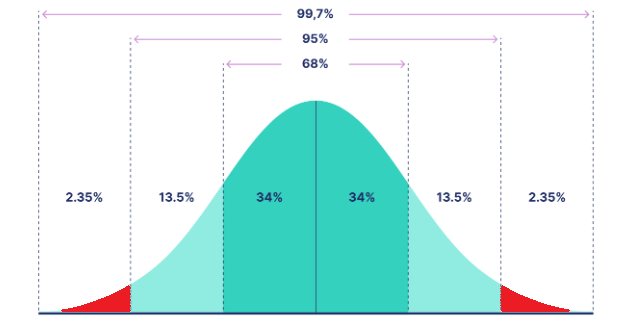

In [ ]:
import random
import math

filter = dados_2021[(dados_2021.possui_internet) == 1]
desvioPadrao = filter["NU_NOTA_REDACAO"].std()
mediaPopulacional = filter["NU_NOTA_REDACAO"].mean()
amostra = filter["NU_NOTA_REDACAO"].sample(50)
mediaAmostra = amostra.mean()
print(mediaPopulacional)
print(mediaAmostra)





620.2200801208049
577.6270890345028


Pode-se notar que o Teste Z resultou em -0.91, ou seja, um valor entre -1.96 e 1.96, desse modo não podemos rejeitar nem aceitar H0. A amostra escolhida não é uma boa generalização para a população de estudantes com internet em seu domicílio.


In [ ]:
z = (mediaAmostra - mediaPopulacional) / (desvioPadrao/math.sqrt(50))
print(z)

-1.9337935844408087


### 3.2 - Q_COMPUTADORES_RESIDENCIA

Utilizaremos o mesmo processo para testar quanto a variável 'q_computadores_residencia'. Iremos tomar como base a população de estudantes que possuem pelo menos um computador em sua residência, e uma amostra com 50 estudantes aleatórios dessa população.

A hipótese nula (H0) é a média dos estudantes que possuem pelo menos 1 computador em suas casas ser realmente 643.18, a hipótese alternativa (H1) é essa média ser algum valor diferente.



In [ ]:
filter  = dados_2021[(dados_2021.q_computadores_residencia) >= 1]
desvioPadrao = filter["NU_NOTA_REDACAO"].std()
mediaPopulacional = filter["NU_NOTA_REDACAO"].mean()
amostra = filter["NU_NOTA_REDACAO"].sample(50)
mediaAmostra = amostra.mean()
print(mediaPopulacional)
print(mediaAmostra)

643.1836834293017
644.2591962069142


Pode-se notar que o valor do Teste Z é 0.4, e encontra-se no intervalo [-1.96,1.96], logo não podemos rejeitar H0, portanto a amostra não é uma boa generalização para a população dos estudantes que possuem pelo menos um computador em suas residências.

In [ ]:
z = (mediaAmostra - mediaPopulacional) / (desvioPadrao/math.sqrt(50))
print(z)

0.048754426422917566


Para fins didáticos podemos, podemos observar o que acontece ao utilizarmos uma amostra de 100000 estudantes dos quais possuem pelo menos 1 computador em casa.

A primeira coisa que pode-se notar é uma maior proximidade entre as médias. Nesse caso H0 é a média realmente ser 643.18, e a H1 é a média ser algum valor diferente.

In [ ]:
filter  = dados_2021[(dados_2021.q_computadores_residencia) >= 1]
desvioPadrao = filter["NU_NOTA_REDACAO"].std()
mediaPopulacional = filter["NU_NOTA_REDACAO"].mean()
amostra = filter["NU_NOTA_REDACAO"].sample(100000)
mediaAmostra = amostra.mean()
print(mediaPopulacional)
print(mediaAmostra)

643.1836834293017
642.3979618500164


Ao efetuarmos o cálculo do Teste Z, obtemos o valor -0.79, ou seja, um valor mais próximo de -1.96, porém continua sendo maior, pois mesmo a amostra sendo maior, ela ainda é uma generalização ruim para uma população de mais de 1.500.000 de estudantes que possuem ao menos um computador.

In [ ]:
z = (mediaAmostra - mediaPopulacional) / (desvioPadrao/math.sqrt(100000))
print(z)

-1.5928766861638746


## 4 - ANÁLISE DE REGRESSÂO
Neste tópico será abordado a contrução do modelo de machine learning utilizando regressão. A Regressão é um dos métodos de previsão mais utilizados no meio estatístico. Tem como principal objetivo verificar como certas variáveis de interesse influenciam uma variável resposta Y e criar um modelo matemático capaz de predizer valores de Y com base em novos valores de variáveis preditoras X(Uma visão geral sobre machine learning - Regressão e Clustering). Neste trabalho será utilizado regressão linear multipla, pois na base de dados trabalhada contém várias variáveis independentes. Ná figura abaixo está a representação gráfica da regressão linear simples (Esquerda) e regressão múltipla (direita).

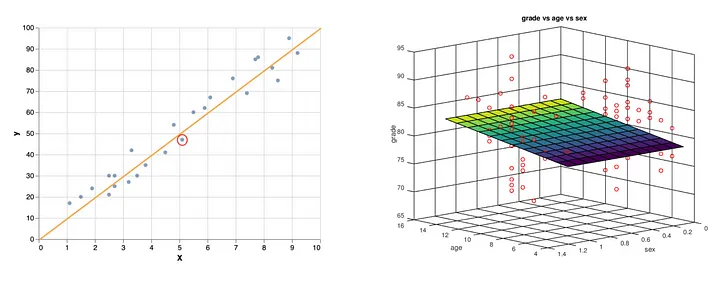
Fonte: Lauradamaceno from Medium



In [ ]:
y = dados_2021['NU_NOTA_REDACAO'] ## Variáveis de resposta
x = dados_2021.iloc[:, 1:] ## Variáveis preditoras

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 2000) ## Separando a base de treinamento da base de teste
print ("Quantidade de observações utilizadas no treinamento: ", x_train.shape[0])
print ("Quantidade de observações utilizadas no teste: ", x_test.shape[0])

Quantidade de observações utilizadas no treinamento:  2066848
Quantidade de observações utilizadas no teste:  885792


In [ ]:
polyreg=LinearRegression()
polyreg.fit(x_train, y_train) ## Treinando o modelo utilizando as observações de teste
y_predict = polyreg.predict(x_test)

mse = metrics.mean_squared_error(y_test,y_predict)
mae = metrics.mean_absolute_error(y_test,y_predict)

print("MSE = {}".format(mse)) ##Erro Quadrático Médio
print("RMSE = {}".format(mse**0.5)) ##Raiz do erro quadrático médio
print("MAE = {}".format(mae)) ##Erro Absoluto Médio

##modelo.coef_, modelo.intercept_

MSE = 21730.66503419887
RMSE = 147.4132457895113
MAE = 97.54891029198971


In [ ]:
polyreg.score(x_train, y_train)

0.10400650555853364

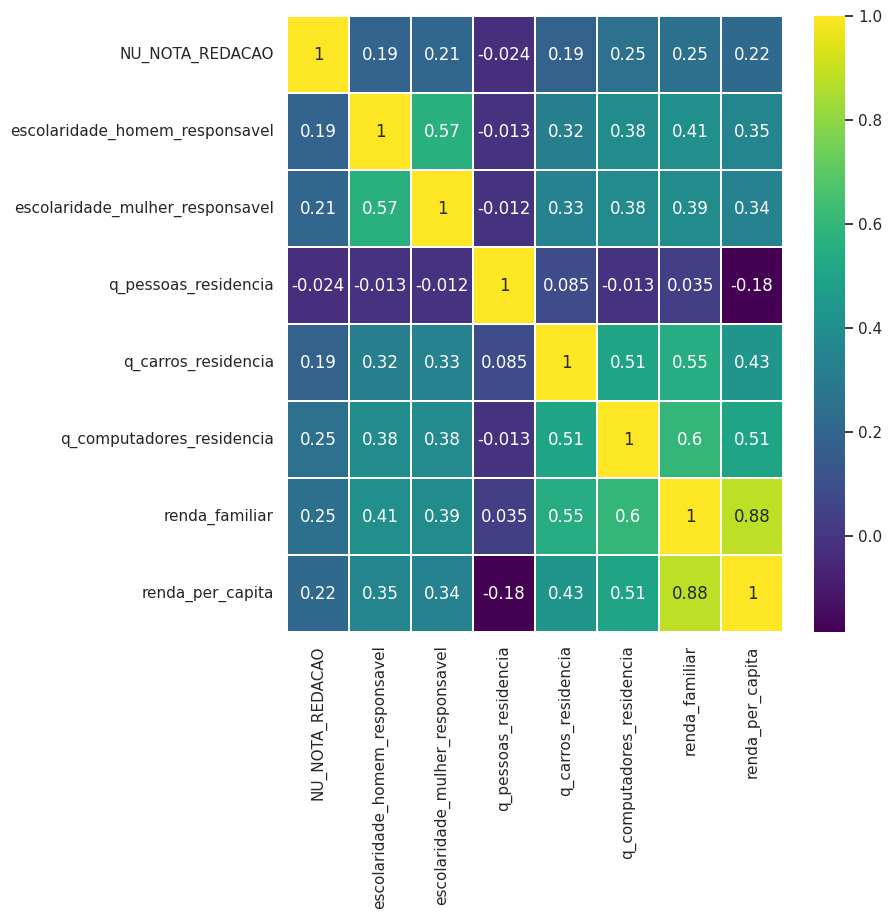

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))

sns.heatmap(dados_2021[['NU_NOTA_REDACAO', 'escolaridade_homem_responsavel', 'escolaridade_mulher_responsavel',
                        'q_pessoas_residencia', 'q_carros_residencia', 'q_computadores_residencia',
                        'renda_familiar', 'renda_per_capita']].corr(), annot=True, cmap='viridis', linewidths=.2, ax = ax)
plt.show()